In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


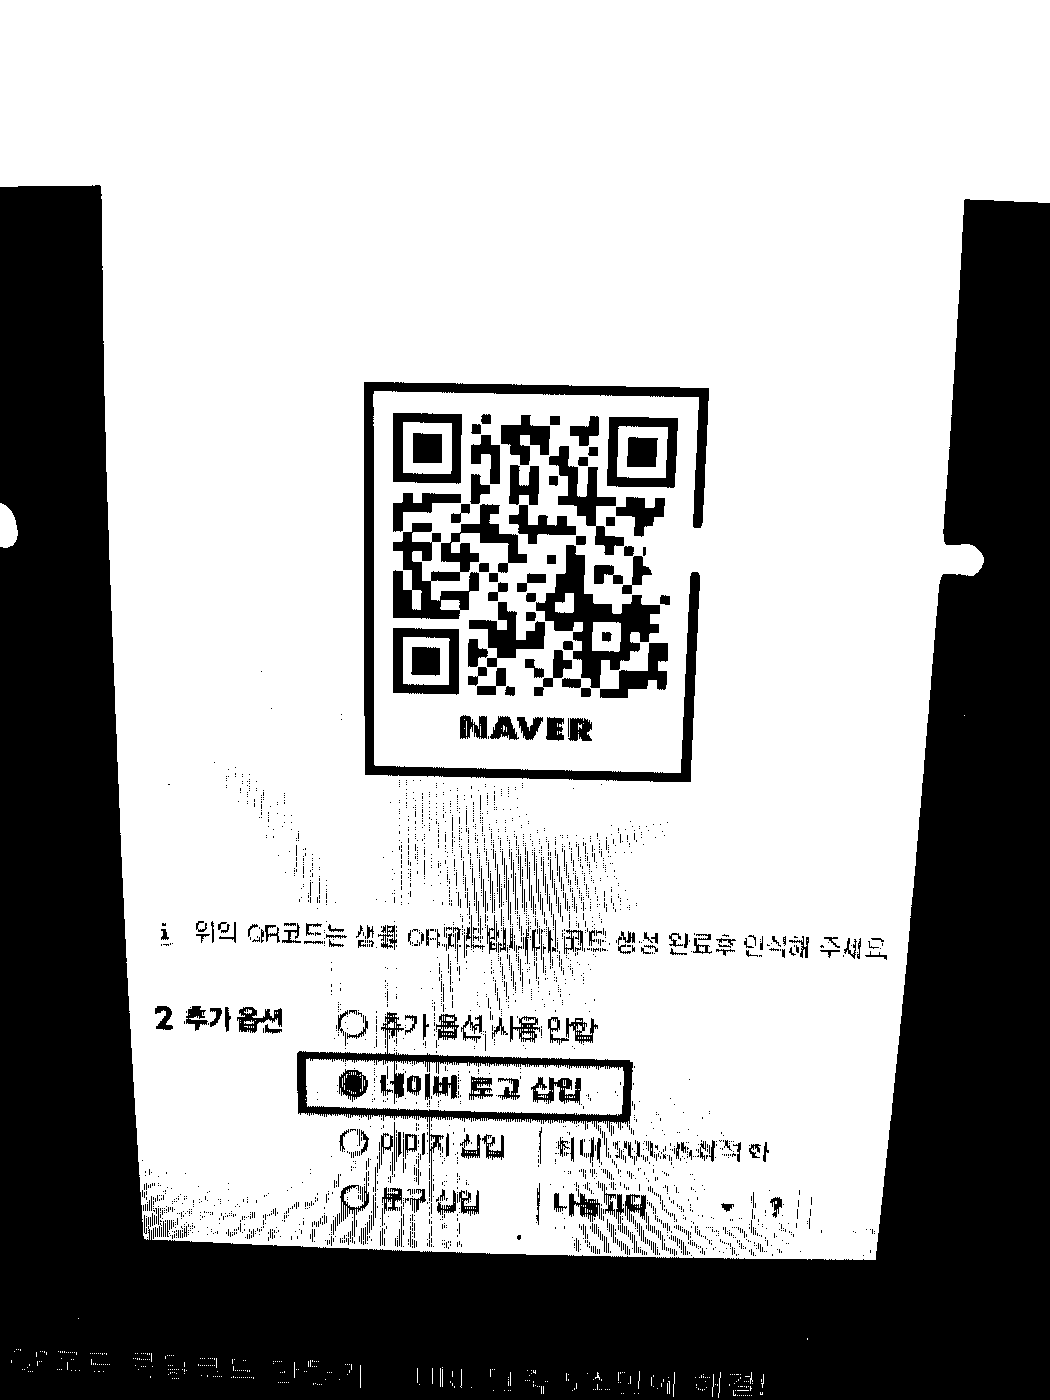

In [38]:
src = cv2.imread('/content/drive/MyDrive/ai_hub/qr2.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, bin = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
cv2_imshow(bin)

In [39]:
bin.dtype

dtype('uint8')

In [40]:
contours, hierarchy = cv2.findContours(bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy = hierarchy[0]

In [ ]:
contours

In [41]:
len(contours)

3744

In [42]:
contours[1001].shape

(4, 1, 2)

In [43]:
len(hierarchy)

3744

In [44]:
hierarchy[1001].shape

(4,)

In [45]:
hierarchy

array([[   1,   -1,   -1,   -1],
       [   2,    0,   -1,   -1],
       [   3,    1,   -1,   -1],
       ...,
       [  -1,   -1, 3742, 3740],
       [  -1,   -1,   -1, 3741],
       [  -1, 3740,   -1,  351]], dtype=int32)

In [46]:
prarent_id = hierarchy[-1][3]
hierarchy[prarent_id] #부모노드 4번째 인자 부모없음

array([ -1, 350, 352,  -1], dtype=int32)

In [47]:
hierarchy[352] # 자식노드

array([353,  -1,  -1, 351], dtype=int32)

In [48]:
contours = list(contours)

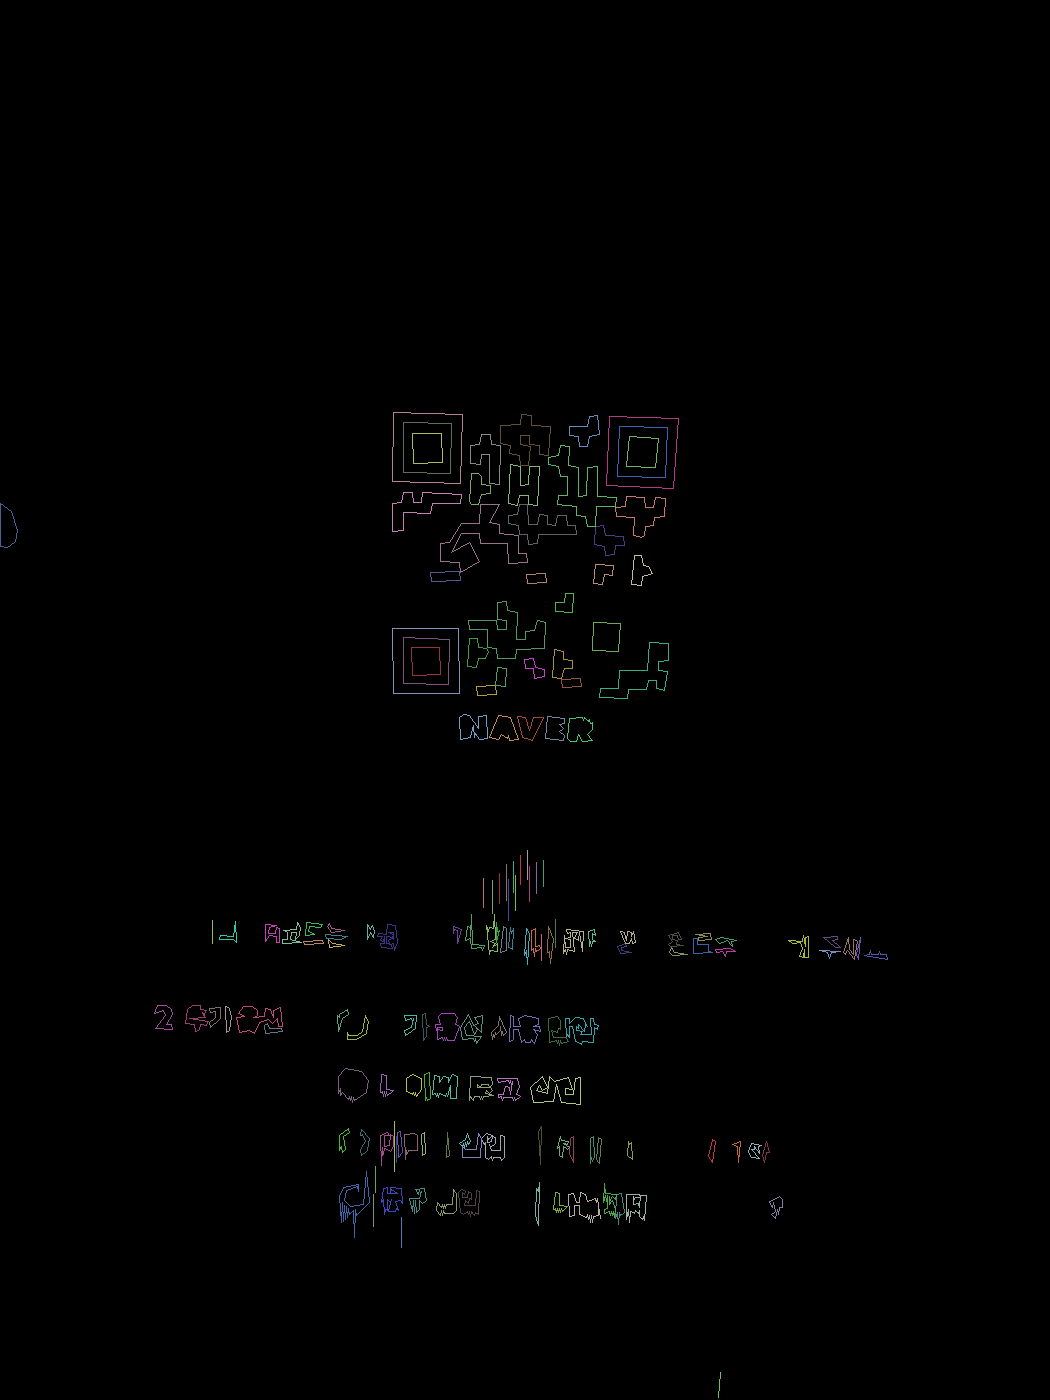

In [49]:
filtered_index = []

dst = np.zeros(src.shape, dtype=np.uint8)
for index, (contour, hie) in enumerate(zip(contours, hierarchy)):
    arcLen = cv2.arcLength(contour, True) #외곽선길이
    if arcLen < 50: continue
    if arcLen > 500: continue
    thres = max(arcLen * 0.01, 2) # 임계값
    contours[index] = cv2.approxPolyDP(contour, thres, True)
    color = [int(i) for i in np.random.randint(50, 200, [3])]
    cv2.drawContours(dst, contours, index, color, 1)
    filtered_index.append(index)
cv2_imshow(dst)

In [50]:
hierarchy.shape

(3744, 4)

In [51]:
len(filtered_index)

152

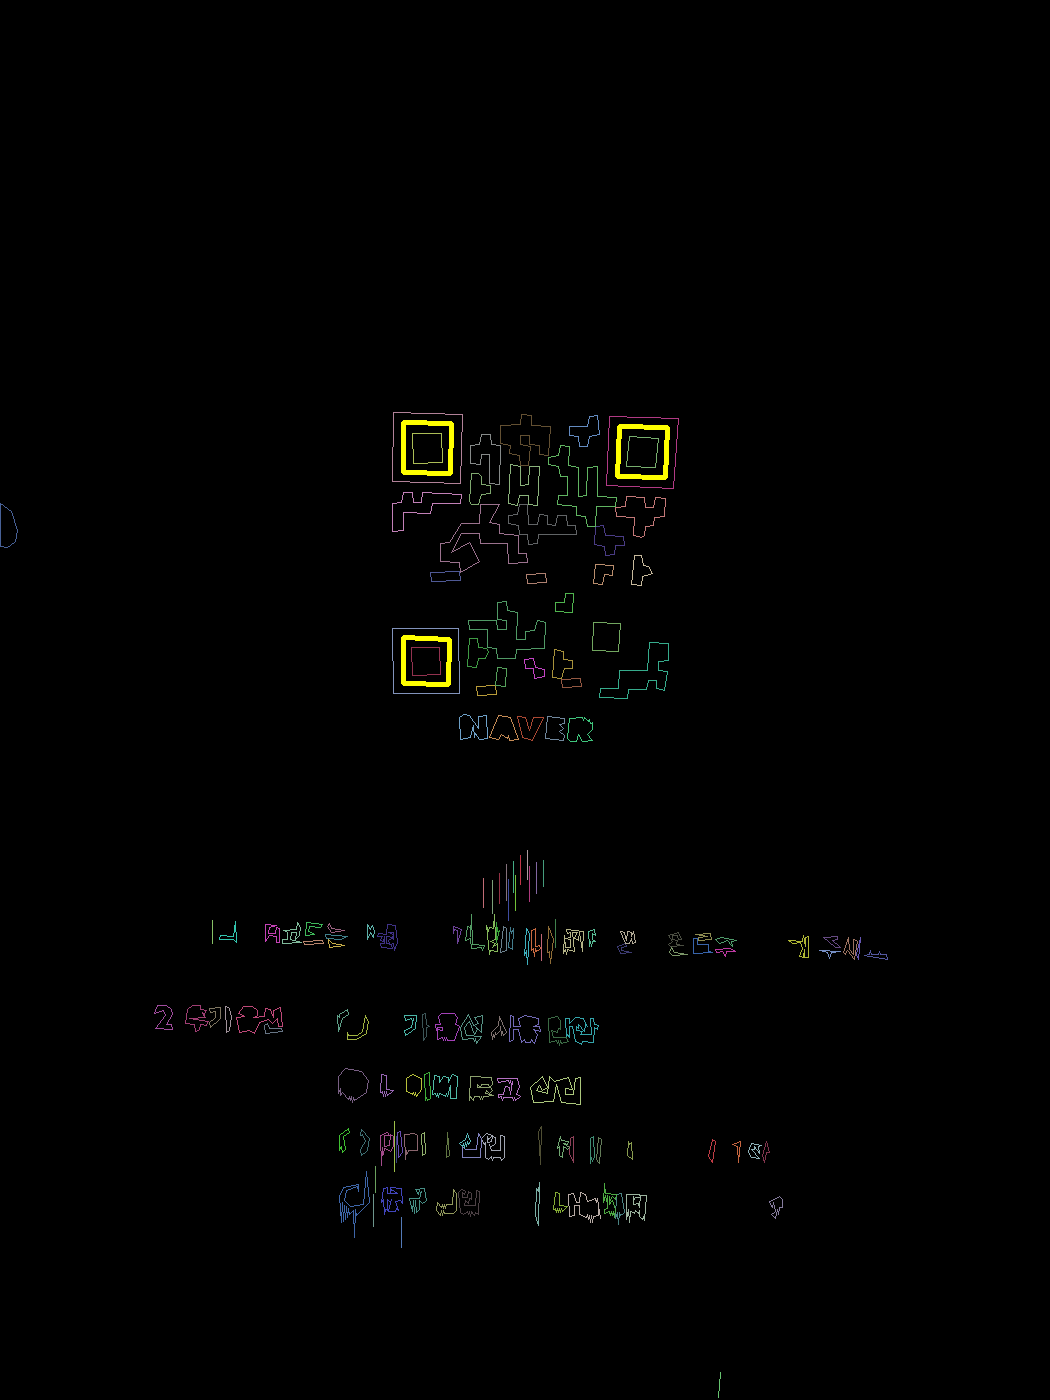

In [54]:
for i in filtered_index:
    hie = hierarchy[i]
    contour = contours[i]
    if hie[3] == -1 or hie[2] == -1:
        continue
    parent = contours[hie[3]]
    child = contours[hie[2]]
    if len(parent) == 4 and len(child) == 4 and len(contour) == 4:
        cv2.drawContours(dst, contours, i, (0, 255, 255), 4) #노란색 마커가 조건에 맞는꼭지점을 찾아 사각형을 그린것
cv2_imshow(dst)

In [ ]:
contours[1151]

array([[[425, 586]],

       [[524, 586]],

       [[516, 688]],

       [[417, 686]],

       [[425, 587]]], dtype=int32)

In [ ]:
hierarchy[10]

array([11,  9, -1, -1], dtype=int32)